In [51]:
import pandas as pd

# Load the dataset
url = "heart-disease.csv"  
df = pd.read_csv(url)


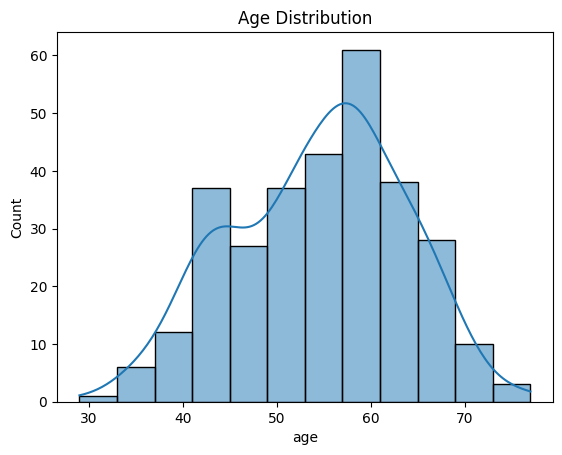

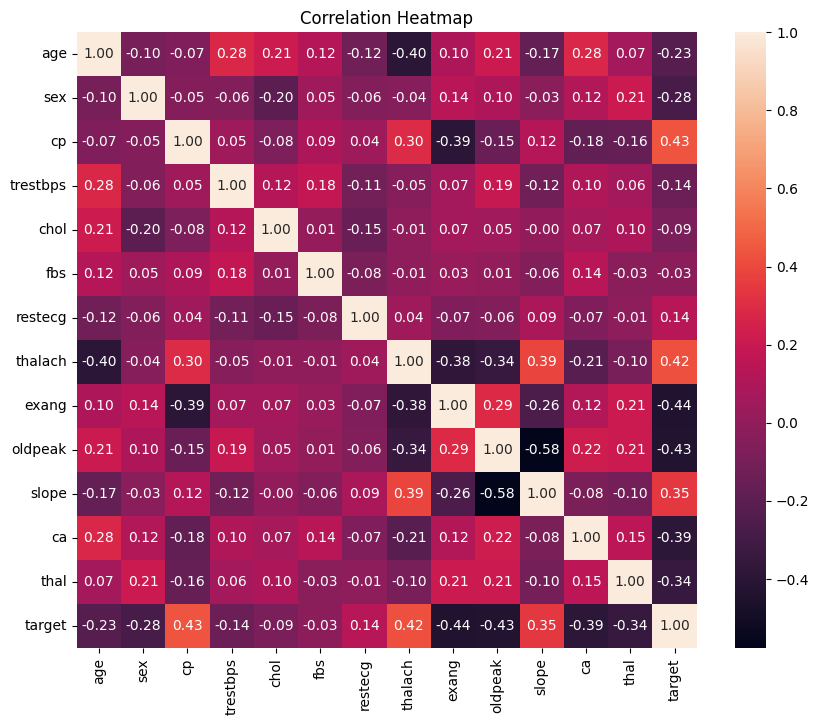

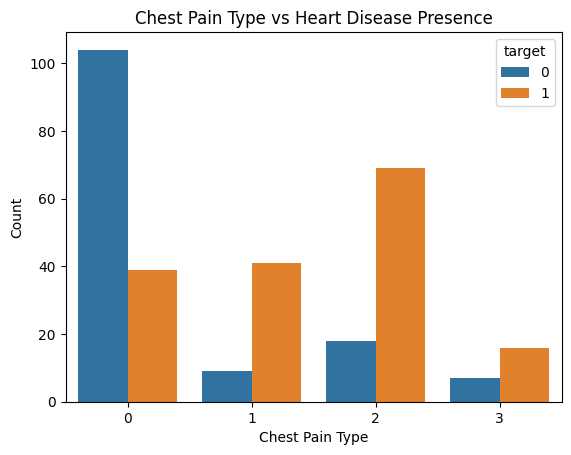

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualization 1: Age distribution
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

sns.countplot(x='cp', hue='target', data=df)
plt.title('Chest Pain Type vs Heart Disease Presence')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()


In [53]:
#train_test_split
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [54]:
#Standardization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [55]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)


In [56]:
#5-Fold Cross-Validation

from sklearn.model_selection import cross_val_score

cv_scores = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores[name] = scores.mean()

print(cv_scores)


{'Naive Bayes': 0.8012181616832781, 'Decision Tree': 0.7686600221483942, 'Random Forest': 0.8204872646733111, 'SVM': 0.8114064230343301, 'KNN': 0.8158361018826135}


In [57]:
predictions = {}
for name, model in models.items():
    predictions[name] = model.predict(X_test)


In [58]:
from sklearn.metrics import classification_report

for name, preds in predictions.items():
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, preds))


Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        41
           1       0.89      0.80      0.84        50

    accuracy                           0.84        91
   macro avg       0.84      0.84      0.83        91
weighted avg       0.84      0.84      0.84        91

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.67      0.78      0.72        41
           1       0.79      0.68      0.73        50

    accuracy                           0.73        91
   macro avg       0.73      0.73      0.73        91
weighted avg       0.73      0.73      0.73        91

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        41
           1       0.82      0.82      0.82        50

    accuracy                           0.80        91
   macr

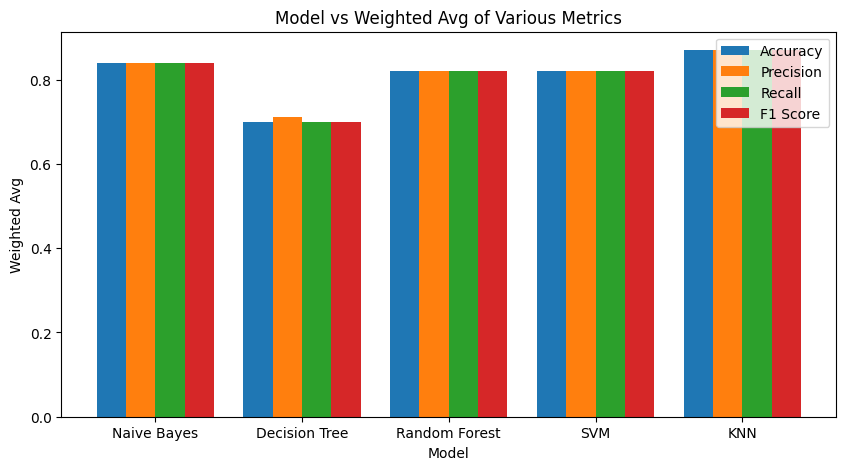

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Naive Bayes', 'Decision Tree', 'Random Forest', 'SVM', 'KNN']

# Corresponding metrics for each model
accuracy = [0.84, 0.70, 0.82, 0.82, 0.87]
precision = [0.84, 0.71, 0.82, 0.82, 0.87]
recall = [0.84, 0.70, 0.82, 0.82, 0.87]
f1_score = [0.84, 0.70, 0.82, 0.82, 0.87]

# Number of models
x = np.arange(len(models))

# Width of bars
width = 0.2

# Plotting
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(x - 1.5*width, accuracy, width, label='Accuracy')
ax.bar(x - 0.5*width, precision, width, label='Precision')
ax.bar(x + 0.5*width, recall, width, label='Recall')
ax.bar(x + 1.5*width, f1_score, width, label='F1 Score')

# Adding labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Weighted Avg')
ax.set_title('Model vs Weighted Avg of Various Metrics')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Display the plot
plt.show()
